In [1]:
%matplotlib inline
import numpy as np
from gainData_cableMeas import GainDataDiff
import gainData_cableMeas as gD
import matplotlib.pyplot as plt

In this notebook, we investigate the impact of moving cables on a differential measurement of $S_{d1d1}$ which is computed from the formula 
\begin{equation}
S_{d1d1}=\frac{1}{2}\left(S_{11} - S_{12} - S_{21} + S_{22} \right)
\end{equation}
In our measurements, we used a two-port single path VNA (Anritsu MS2024A) calibrated using standard SOLT calibration. 

![title](measurement_short.jpg)

Since the VNA is only one-path, we cannot measure $S_{22}$ and $S_{12}$ directly and must obtain them indireclty by switching the cable connections and measuring $S_{11}'$ and $S_{21}'$. In these notes, we experiment with two methods for switching the cables, turning the connection module upside down (which has a minimial impact on the signal path) whose setup is shown below, and crossing the cables. 

![title](measurement_short_ud.jpg)

First lets load the ud and cross $S_{d1d1}$ measurements and compare them in frequency and time. 

In [2]:
rootDir='../cables_and_feed_through_module_May_19_2017/'
filesUD=[rootDir+'s11',
       rootDir+'s12_ud',
       rootDir+'s21',
       rootDir+'s22_ud']
sd1d1_ud=GainDataDiff(filesUD,'ANRITSU_CSV',0.05,0.25)
filesCross=[rootDir+'s11',
       rootDir+'s12_cross',
       rootDir+'s21',
       rootDir+'s22_cross']
sd1d1_cross=GainDataDiff(filesUD,'ANRITSU_CSV',0.05,0.25)

Let's compare the delay and frequency domain for these measurements. We see that there is virtually no difference between the cross and ud measurements. Thus, moving the cables (at least of this quality) by a small amount at the antenna terminals should not have a significant impact on a measurement of the S-parameters and we are probably fine using a one-path VNA. We see that the systematics floor for $S_{21}$ and $S_{12}$ are also negligible compared to the $S_{11}$ and $S_{22}$ systematics floors. The cross and ud measurements are numerically identical.

/Users/aaronew/Python/analysis/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


True


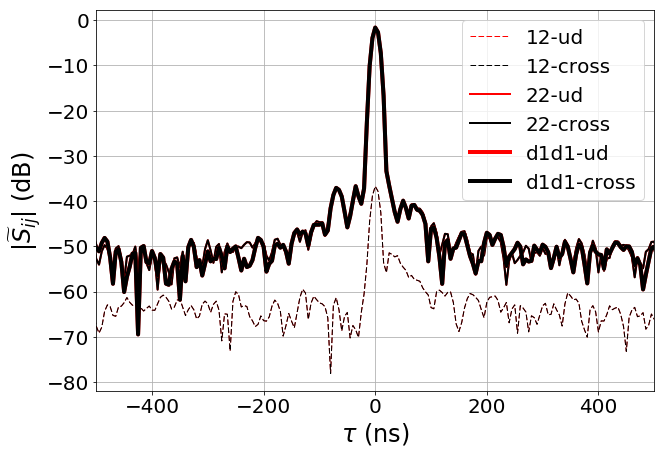

In [3]:
plt.plot(sd1d1_ud.tAxis,10.*np.log10(sd1d1_ud.S12.gainDelay),
         label='12-ud',color='r',lw=1,ls='--')
plt.plot(sd1d1_cross.tAxis,10.*np.log10(sd1d1_cross.S12.gainDelay),
         label='12-cross',color='k',lw=1,ls='--')

plt.plot(sd1d1_ud.tAxis,10.*np.log10(sd1d1_ud.S22.gainDelay),
         label='22-ud',color='r',lw=2,ls='-')
plt.plot(sd1d1_cross.tAxis,10.*np.log10(sd1d1_cross.S22.gainDelay),
         label='22-cross',color='k',lw=2)

plt.plot(sd1d1_ud.tAxis,10.*np.log10(sd1d1_ud.gainDelay),
         label='d1d1-ud',color='r',lw=4)
plt.plot(sd1d1_cross.tAxis,10.*np.log10(sd1d1_cross.gainDelay),
         label='d1d1-cross',color='k',lw=4)
plt.xlabel('$\\tau$ (ns)',fontsize=24)
plt.ylabel('$|\widetilde{S}_{ij}|$ (dB)',fontsize=24)
plt.xlim(-500,500)
plt.grid()
plt.legend(loc='best',fontsize=20)
plt.gcf().set_size_inches(10,7)
plt.gca().tick_params(labelsize=20)
print np.all(sd1d1_ud.gainDelay==sd1d1_cross.gainDelay)


Next we take a look at the long cables. Here we perform the same $S_{11}$, $S_{21}$, and $S_{12},S_{22}$ flipped and crossed measurements as above. 

Below is the setup for the $S_{11},S_{21}$ measurement with a long SMA cable.
![title](measurement_long.jpg)
Below is the measurement of $S_{12},S_{22}$ by flipping the module. 
![title](measurement_long_ud.jpg)
Below is the measurement of $S_{12},S_{22}$ by crossing the cables. 
![title](measurement_long_cross.jpg)

Before looking at return loss, it is useful to determine the electrical length of the the cable with a phase measurement before performing calibration. To do this, I remove the long cable (after having calibrated it) and measure the phase slope to determine the electrical length. The round-trip delay, $\tau_{rt}$ in the cable is related to the phase through
\begin{equation}
\phi = 2 \pi \nu \tau_{rt}+\phi_0 = a_\phi \nu + \phi_0
\end{equation}
so we simply solve for $\tau_{rt}$ by fitting the slope of phase versus frequency, $a_\phi$.
\begin{equation}
\tau_{rt} = \frac{a_\phi}{2 \pi \nu}
\end{equation}

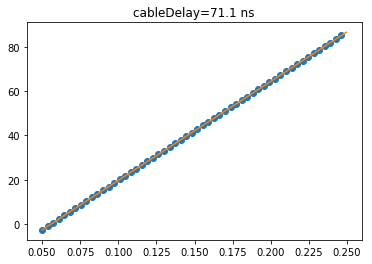

In [4]:
rootDir='../cables_and_feed_through_module_May_19_2017/'
phase_data=gD.readAnritsuCSV(rootDir+'s11_cable_phase.csv')
phase_data[:,1]=np.unwrap(np.radians(phase_data[:,1]))
pFit=np.polyfit(phase_data[:,0],phase_data[:,1],1)
plt.plot(phase_data[::10,0],phase_data[::10,1],ls='None',marker='o')
plt.plot(phase_data[:,0],pFit[1]+pFit[0]*phase_data[:,0])
cableDelay=pFit[0]/(2.*np.pi)
plt.title('cableDelay=%.1f ns'%cableDelay)

In [5]:
rootDir='../cables_and_feed_through_module_May_19_2017/'
filesUD=[rootDir+'s11_long',
       rootDir+'s12_long_ud',
       rootDir+'s21_long',
       rootDir+'s22_long_ud']
sd1d1_long_ud=GainDataDiff(filesUD,'ANRITSU_CSV',0.05,0.25)
filesCross=[rootDir+'s11_long',
       rootDir+'s12_long_cross',
       rootDir+'s21_long',
       rootDir+'s22_long_cross']
sd1d1_long_cross=GainDataDiff(filesUD,'ANRITSU_CSV',0.05,0.25)

We find that with the long cables, the measurement is clearly different from what is seen with the short cables however crossing the cables versus flipping the DUT does not appear to have a measured effect. 

True


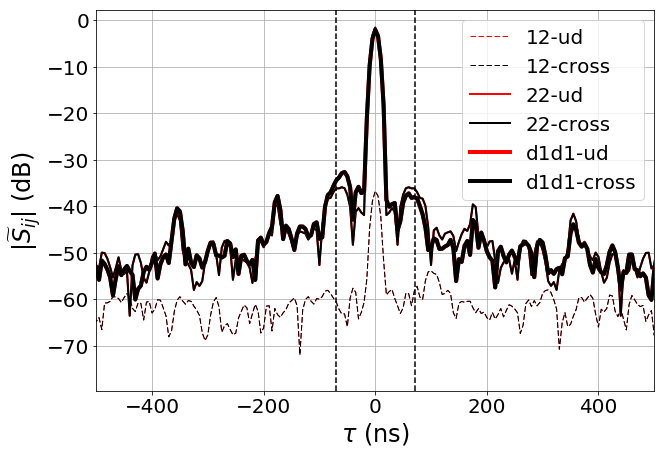

In [6]:
plt.plot(sd1d1_long_ud.tAxis,10.*np.log10(sd1d1_long_ud.S12.gainDelay),
         label='12-ud',color='r',lw=1,ls='--')
plt.plot(sd1d1_long_cross.tAxis,10.*np.log10(sd1d1_long_cross.S12.gainDelay),
         label='12-cross',color='k',lw=1,ls='--')

plt.plot(sd1d1_long_ud.tAxis,10.*np.log10(sd1d1_long_ud.S22.gainDelay),
         label='22-ud',color='r',lw=2,ls='-')
plt.plot(sd1d1_long_cross.tAxis,10.*np.log10(sd1d1_long_cross.S22.gainDelay),
         label='22-cross',color='k',lw=2)

plt.plot(sd1d1_long_ud.tAxis,10.*np.log10(sd1d1_long_ud.gainDelay),
         label='d1d1-ud',color='r',lw=4)
plt.plot(sd1d1_long_cross.tAxis,10.*np.log10(sd1d1_long_cross.gainDelay),
         label='d1d1-cross',color='k',lw=4)
plt.axvline(cableDelay,color='k',ls='--')
plt.axvline(-cableDelay,color='k',ls='--')
plt.xlabel('$\\tau$ (ns)',fontsize=24)
plt.ylabel('$|\widetilde{S}_{ij}|$ (dB)',fontsize=24)
plt.xlim(-500,500)
plt.grid()
plt.legend(loc='best',fontsize=20)
plt.gcf().set_size_inches(10,7)
plt.gca().tick_params(labelsize=20)
print np.all(sd1d1_long_ud.gainDelay==sd1d1_long_cross.gainDelay)



Next we try moving the cables from their original calibration positions (beyond just performing the cross/ud changes). 

Below is the setup configuration for the moved cables. 
![title](measurement_long_moved.jpg)

In [7]:
rootDir='../cables_and_feed_through_module_May_19_2017/'
filesUD=[rootDir+'s11_long_moved',
       rootDir+'s12_long_ud_moved',
       rootDir+'s21_long_moved',
       rootDir+'s22_long_ud_moved']
sd1d1_moved_long_ud=GainDataDiff(filesUD,'ANRITSU_CSV',0.05,0.25)
filesCross=[rootDir+'s11_moved_long',
       rootDir+'s12_long_cross_moved',
       rootDir+'s21_long_moved',
       rootDir+'s22_long_cross_moved']
sd1d1_moved_long_cross=GainDataDiff(filesUD,'ANRITSU_CSV',0.05,0.25)

True


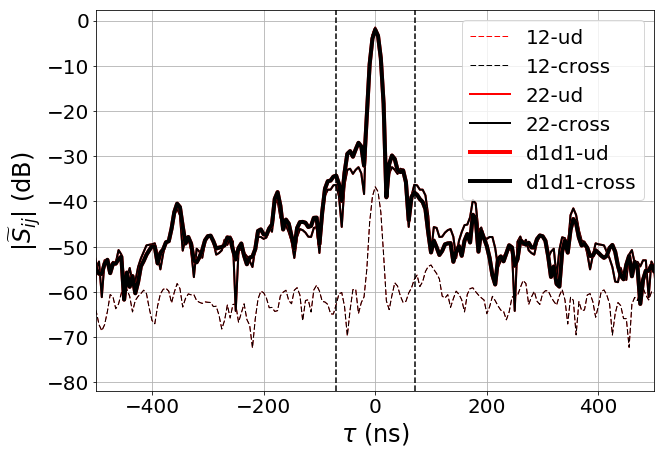

In [8]:
plt.plot(sd1d1_moved_long_ud.tAxis,10.*np.log10(sd1d1_moved_long_ud.S12.gainDelay),
         label='12-ud',color='r',lw=1,ls='--')
plt.plot(sd1d1_moved_long_cross.tAxis,10.*np.log10(sd1d1_moved_long_cross.S12.gainDelay),
         label='12-cross',color='k',lw=1,ls='--')

plt.plot(sd1d1_moved_long_ud.tAxis,10.*np.log10(sd1d1_moved_long_ud.S22.gainDelay),
         label='22-ud',color='r',lw=2,ls='-')
plt.plot(sd1d1_moved_long_cross.tAxis,10.*np.log10(sd1d1_moved_long_cross.S22.gainDelay),
         label='22-cross',color='k',lw=2)

plt.plot(sd1d1_moved_long_ud.tAxis,10.*np.log10(sd1d1_moved_long_ud.gainDelay),
         label='d1d1-ud',color='r',lw=4)
plt.plot(sd1d1_moved_long_cross.tAxis,10.*np.log10(sd1d1_moved_long_cross.gainDelay),
         label='d1d1-cross',color='k',lw=4)
plt.xlabel('$\\tau$ (ns)',fontsize=24)
plt.axvline(cableDelay,color='k',ls='--')
plt.axvline(-cableDelay,color='k',ls='--')
plt.ylabel('$|\widetilde{S}_{ij}|$ (dB)',fontsize=24)
plt.xlim(-500,500)
plt.grid()
plt.legend(loc='best',fontsize=20)
plt.gcf().set_size_inches(10,7)
plt.gca().tick_params(labelsize=20)
print np.all(sd1d1_moved_long_ud.gainDelay==sd1d1_moved_long_cross.gainDelay)




Lets compare the measurement with cables moved from original calibration position to when they are not moved from their calibration configuration. Comparing moved versus not moved, we see that there is a $\approx 10$\,dB systematics floor introduced by the cable! (dynamic range goes from $\approx 40\,$dB within the delays occupied by the cable to $30\,$dB. 

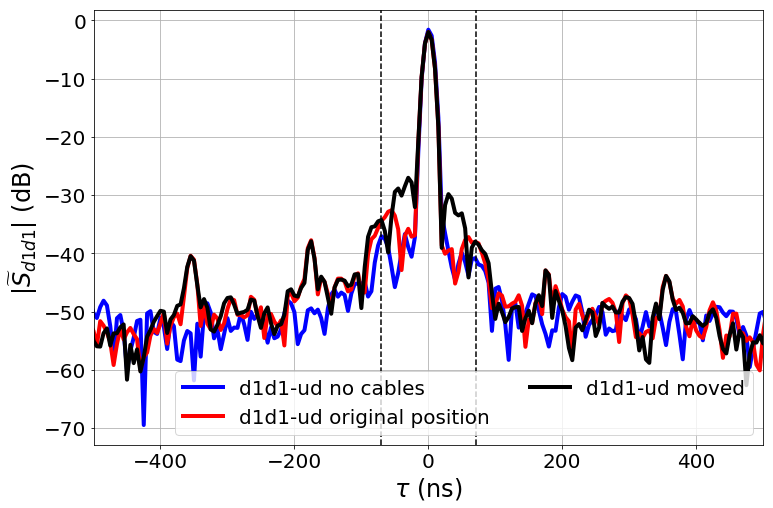

In [12]:

plt.plot(sd1d1_ud.tAxis,10.*np.log10(sd1d1_ud.gainDelay),
         label='d1d1-ud no cables',color='b',lw=4)
plt.plot(sd1d1_long_ud.tAxis,10.*np.log10(sd1d1_long_ud.gainDelay),
         label='d1d1-ud original position',color='r',lw=4)
plt.plot(sd1d1_moved_long_ud.tAxis,10.*np.log10(sd1d1_moved_long_ud.gainDelay),
         label='d1d1-ud moved',color='k',lw=4)
plt.xlabel('$\\tau$ (ns)',fontsize=24)
plt.ylabel('$|\widetilde{S}_{d1d1}|$ (dB)',fontsize=24)
plt.xlim(-500,500)
plt.grid()
plt.axvline(cableDelay,color='k',ls='--')
plt.axvline(-cableDelay,color='k',ls='--')
plt.legend(loc='best',fontsize=20,ncol=2)
plt.gcf().set_size_inches(12,8)
plt.gca().tick_params(labelsize=20)

Finally, at the behest of Nima and Rich on the telecon, suggesting the presence of ground loops and surface currents potentially being excited on cables that are not kept together, I take measurements with the long cables twisted together, moved and not moved. I only perform the $S_{12}$ and $S_{22}$ measurements by flipping the transition board over, rather than crossing the cables (since, as we saw above, there is no measureable difference). SOLT calibration is performed at the end of the twisted cable. 

Below is the setup for the measurement with the twisted cable without moving it from its calibration position:
![title](twisted_measurement.jpg)
Below is the measurement setup for $S_{22}$ and $S_{12}$. 
![title](twisted_measurement_ud.jpg)
Below is the measurement setup with the cable moved from its calibration position.
![title](twisted_measurement_moved.jpg)

In [10]:
rootDir='../twisted_cable_measurements_may_24_2017/'
filesTwisted=[rootDir+'s11_twisted',
       rootDir+'s12_twisted',
       rootDir+'s21_twisted',
       rootDir+'s22_twisted']
sd1d1_twisted=GainDataDiff(filesTwisted,'ANRITSU_CSV',0.05,0.25)
filesTwistedMoved=[rootDir+'s11_twisted_moved',
       rootDir+'s12_twisted_moved',
       rootDir+'s21_twisted_moved',
       rootDir+'s22_twisted_moved']
sd1d1_twisted_moved=GainDataDiff(filesTwistedMoved,'ANRITSU_CSV',0.05,0.25)

Inspecting the results for the twisted cable, we see that the same issue is present, perahps slightly more severe then without the twists (which we might expect if the tests introduce worse sub-reflections). Even if we have greatly reduced the net-flux through the cables by twisting.

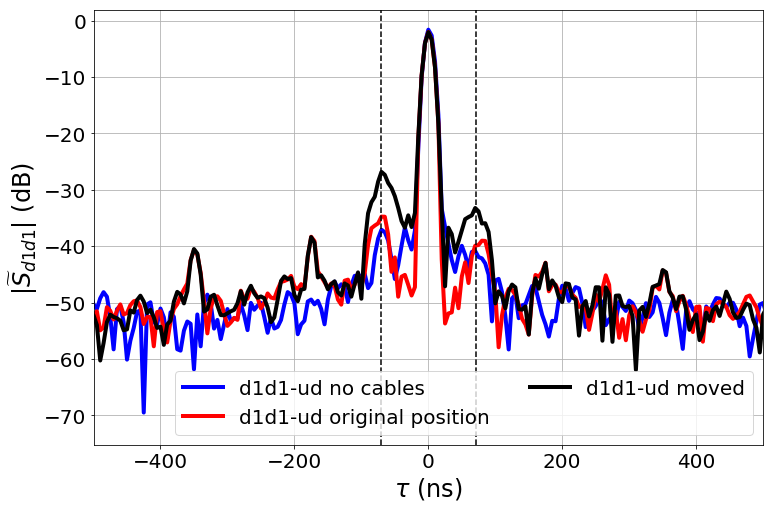

In [13]:

plt.plot(sd1d1_ud.tAxis,10.*np.log10(sd1d1_ud.gainDelay),
         label='d1d1-ud no cables',color='b',lw=4)
plt.plot(sd1d1_twisted.tAxis,10.*np.log10(sd1d1_twisted.gainDelay),
         label='d1d1-ud original position',color='r',lw=4)
plt.plot(sd1d1_twisted_moved.tAxis,10.*np.log10(sd1d1_twisted_moved.gainDelay),
         label='d1d1-ud moved',color='k',lw=4)
plt.xlabel('$\\tau$ (ns)',fontsize=24)
plt.ylabel('$|\widetilde{S}_{d1d1}|$ (dB)',fontsize=24)
plt.xlim(-500,500)
plt.grid()
plt.axvline(cableDelay,color='k',ls='--')
plt.axvline(-cableDelay,color='k',ls='--')
plt.legend(loc='best',fontsize=20,ncol=2)
plt.gcf().set_size_inches(12,8)
plt.gca().tick_params(labelsize=20)




